In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['axes.unicode_minus'] = False
import warnings

warnings.filterwarnings("ignore")

In [26]:
from sklearn.preprocessing import StandardScaler


file_path = r"C:\Users\30393\Desktop\data.xlsx"
df = pd.read_excel(file_path, sheet_name='Apr_TPA')


numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns


scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
means = scaler.mean_
stds = scaler.scale_


stats_df = pd.DataFrame({
    'Column': numerical_columns,
    'Mean': means,
    'Std': stds
})


print(stats_df)

output_file_path = r"C:\Users\30393\Desktop\Apr_TPA_scaler.xlsx"
df.to_excel(output_file_path, index=False)

       Column        Mean        Std
0        Year    2.031579   0.857814
1           R  124.360526  12.741985
2           G  135.157895   9.104875
3           B   26.142105   5.363700
4          NR    0.434389   0.019732
5          NG    0.473083   0.005411
6          NB    0.092527   0.022923
7          GB    5.422744   1.275120
8          RB    5.020732   1.343405
9          GR    1.091081   0.045306
10         BI  107.207804   8.368457
11        BIM   13.792832   0.445140
12        SCI   -0.043110   0.020618
13        GLI    0.284570   0.009969
14         HI    0.789986   0.108841
15      NGRDI    0.043110   0.020618
16      NDGBI    0.675156   0.068759
17      NDRBI    0.649354   0.084260
18          I  285.660526  18.444491
19          S    0.722418   0.068768
20       VARI    0.038694   0.017659
21        HUE   -1.555010   0.113236
22       HUE2   -1.566805   0.000654
23        BGI    0.195980   0.050237
24          L   95.220175   6.148164
25       GRAY  119.501682   8.694945
2

In [27]:
df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")
from sklearn.model_selection import train_test_split

X = df.drop(['Year', 'Number', 'TPA(mg/g)'], axis=1)
y = df['TPA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np


rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)


feature_importance = rf_model.feature_importances_
print("Feature Importance:", feature_importance)  


feature_importance_df = pd.DataFrame({                
'Feature': X.columns,                
'Importance': feature_importance
})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


top_sixteen_features_df = feature_importance_df.head(16)

print(top_sixteen_features_df)

Feature Importance: [0.06746984 0.12297785 0.0032248  0.00367047 0.00635455 0.01166762
 0.00406785 0.0094481  0.00160127 0.06295136 0.00983688 0.00248202
 0.00653023 0.00203605 0.00201133 0.00716804 0.00376939 0.03303354
 0.0098706  0.00934144 0.0052897  0.01140667 0.01236019 0.00319396
 0.09604071 0.0021832  0.00442535 0.00956934 0.00968426 0.16055808
 0.00624193 0.05502538 0.00130917 0.06844035 0.02255357 0.02508783
 0.1077027  0.00939583 0.01001854]
   Feature  Importance
29   RminB    0.160558
1        G    0.122978
36      a*    0.107703
24    GRAY    0.096041
33   GminB    0.068440
0        R    0.067470
9       BI    0.062951
31  RplusG    0.055025
17       I    0.033034
35      L*    0.025088
34  BplusG    0.022554
22     BGI    0.012360
5       NB    0.011668
21    HUE2    0.011407
38      C*    0.010019
18       S    0.009871


In [29]:

output_file = 'top_sixteen_features_Apr_TPA.xlsx'

try:
    
    top_sixteen_features_df.to_excel(output_file, index=False)
    print(f"\nThe first 16 important features have been successfully saved {output_file}")
    
except Exception as e:
    
    print(f"\nSave Failed: {e}")


The first 16 important features have been successfully saved top_sixteen_features_Apr_TPA.xlsx


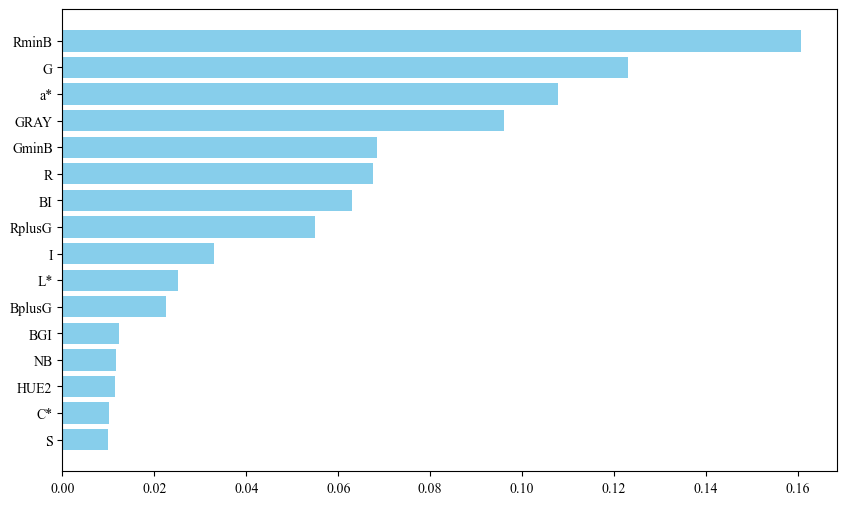

In [30]:
plt.figure(figsize=(10, 6))
plt.barh(top_sixteen_features_df['Feature'], top_sixteen_features_df['Importance'], color='skyblue')
plt.savefig('Apr_TPA_a.png', dpi=600, bbox_inches='tight')
plt.gca().invert_yaxis()  
plt.show()

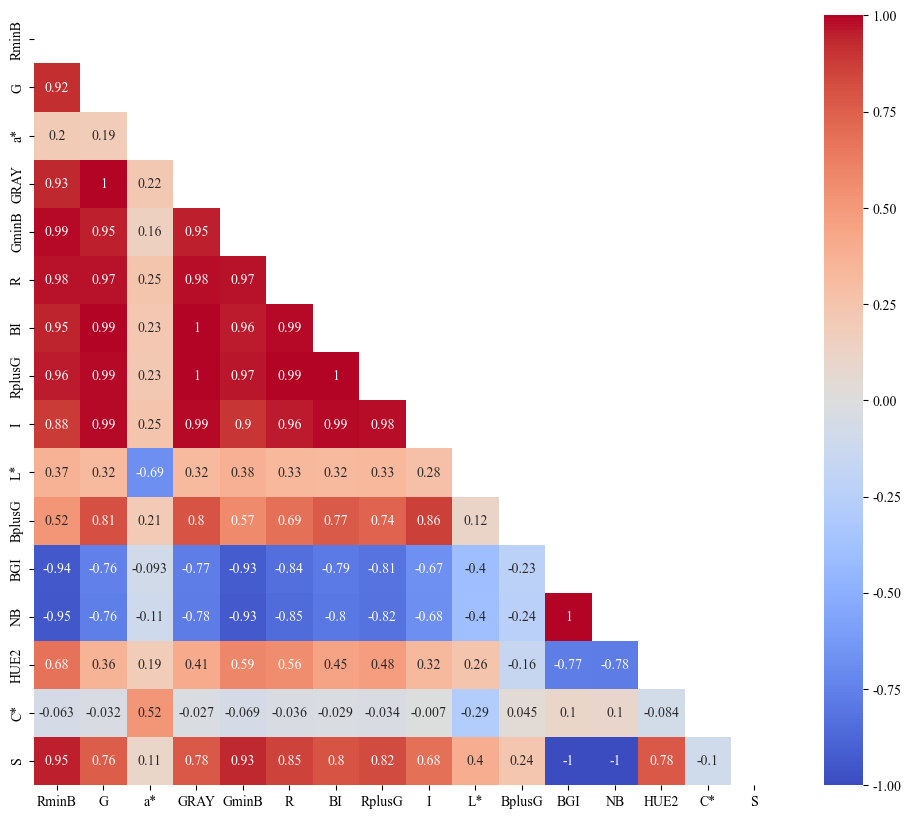

In [31]:
import seaborn as sns

correlation_matrix = X.corr(method='pearson')
top_sixteen_features = top_sixteen_features_df['Feature']



final_corr_matrix = correlation_matrix.loc[top_sixteen_features, top_sixteen_features]



plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(final_corr_matrix, dtype=bool))
sns.heatmap(final_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, mask=mask)

plt.savefig('Apr_TPA_b.jpg', dpi=600, bbox_inches='tight')

plt.show()


In [32]:
import pandas as pd

def select_top_features_by_correlation(corr_matrix, features, feature_importance_df, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(features)):
        for j in range(i + 1, len(features)):
            if abs(corr_matrix.loc[features[i], features[j]]) > threshold:
                high_corr_pairs.append((features[i], features[j]))

    features_to_remove = set()

    for pair in high_corr_pairs:
        importance_1 = feature_importance_df[feature_importance_df['Feature'] == pair[0]]['Importance'].values[0]
        importance_2 = feature_importance_df[feature_importance_df['Feature'] == pair[1]]['Importance'].values[0]

        if importance_1 < importance_2:
            features_to_remove.add(pair[0])
        else:
            features_to_remove.add(pair[1])

    filtered_features = [feature for feature in features if feature not in features_to_remove]
    return filtered_features

sorted_features = list(top_sixteen_features_df['Feature'][:16])

final_features = select_top_features_by_correlation(correlation_matrix, sorted_features, top_sixteen_features_df, threshold=0.95)
print("Final Retained Features：", final_features)

Final Retained Features： ['RminB', 'G', 'a*', 'L*', 'BplusG', 'BGI', 'HUE2', 'C*']


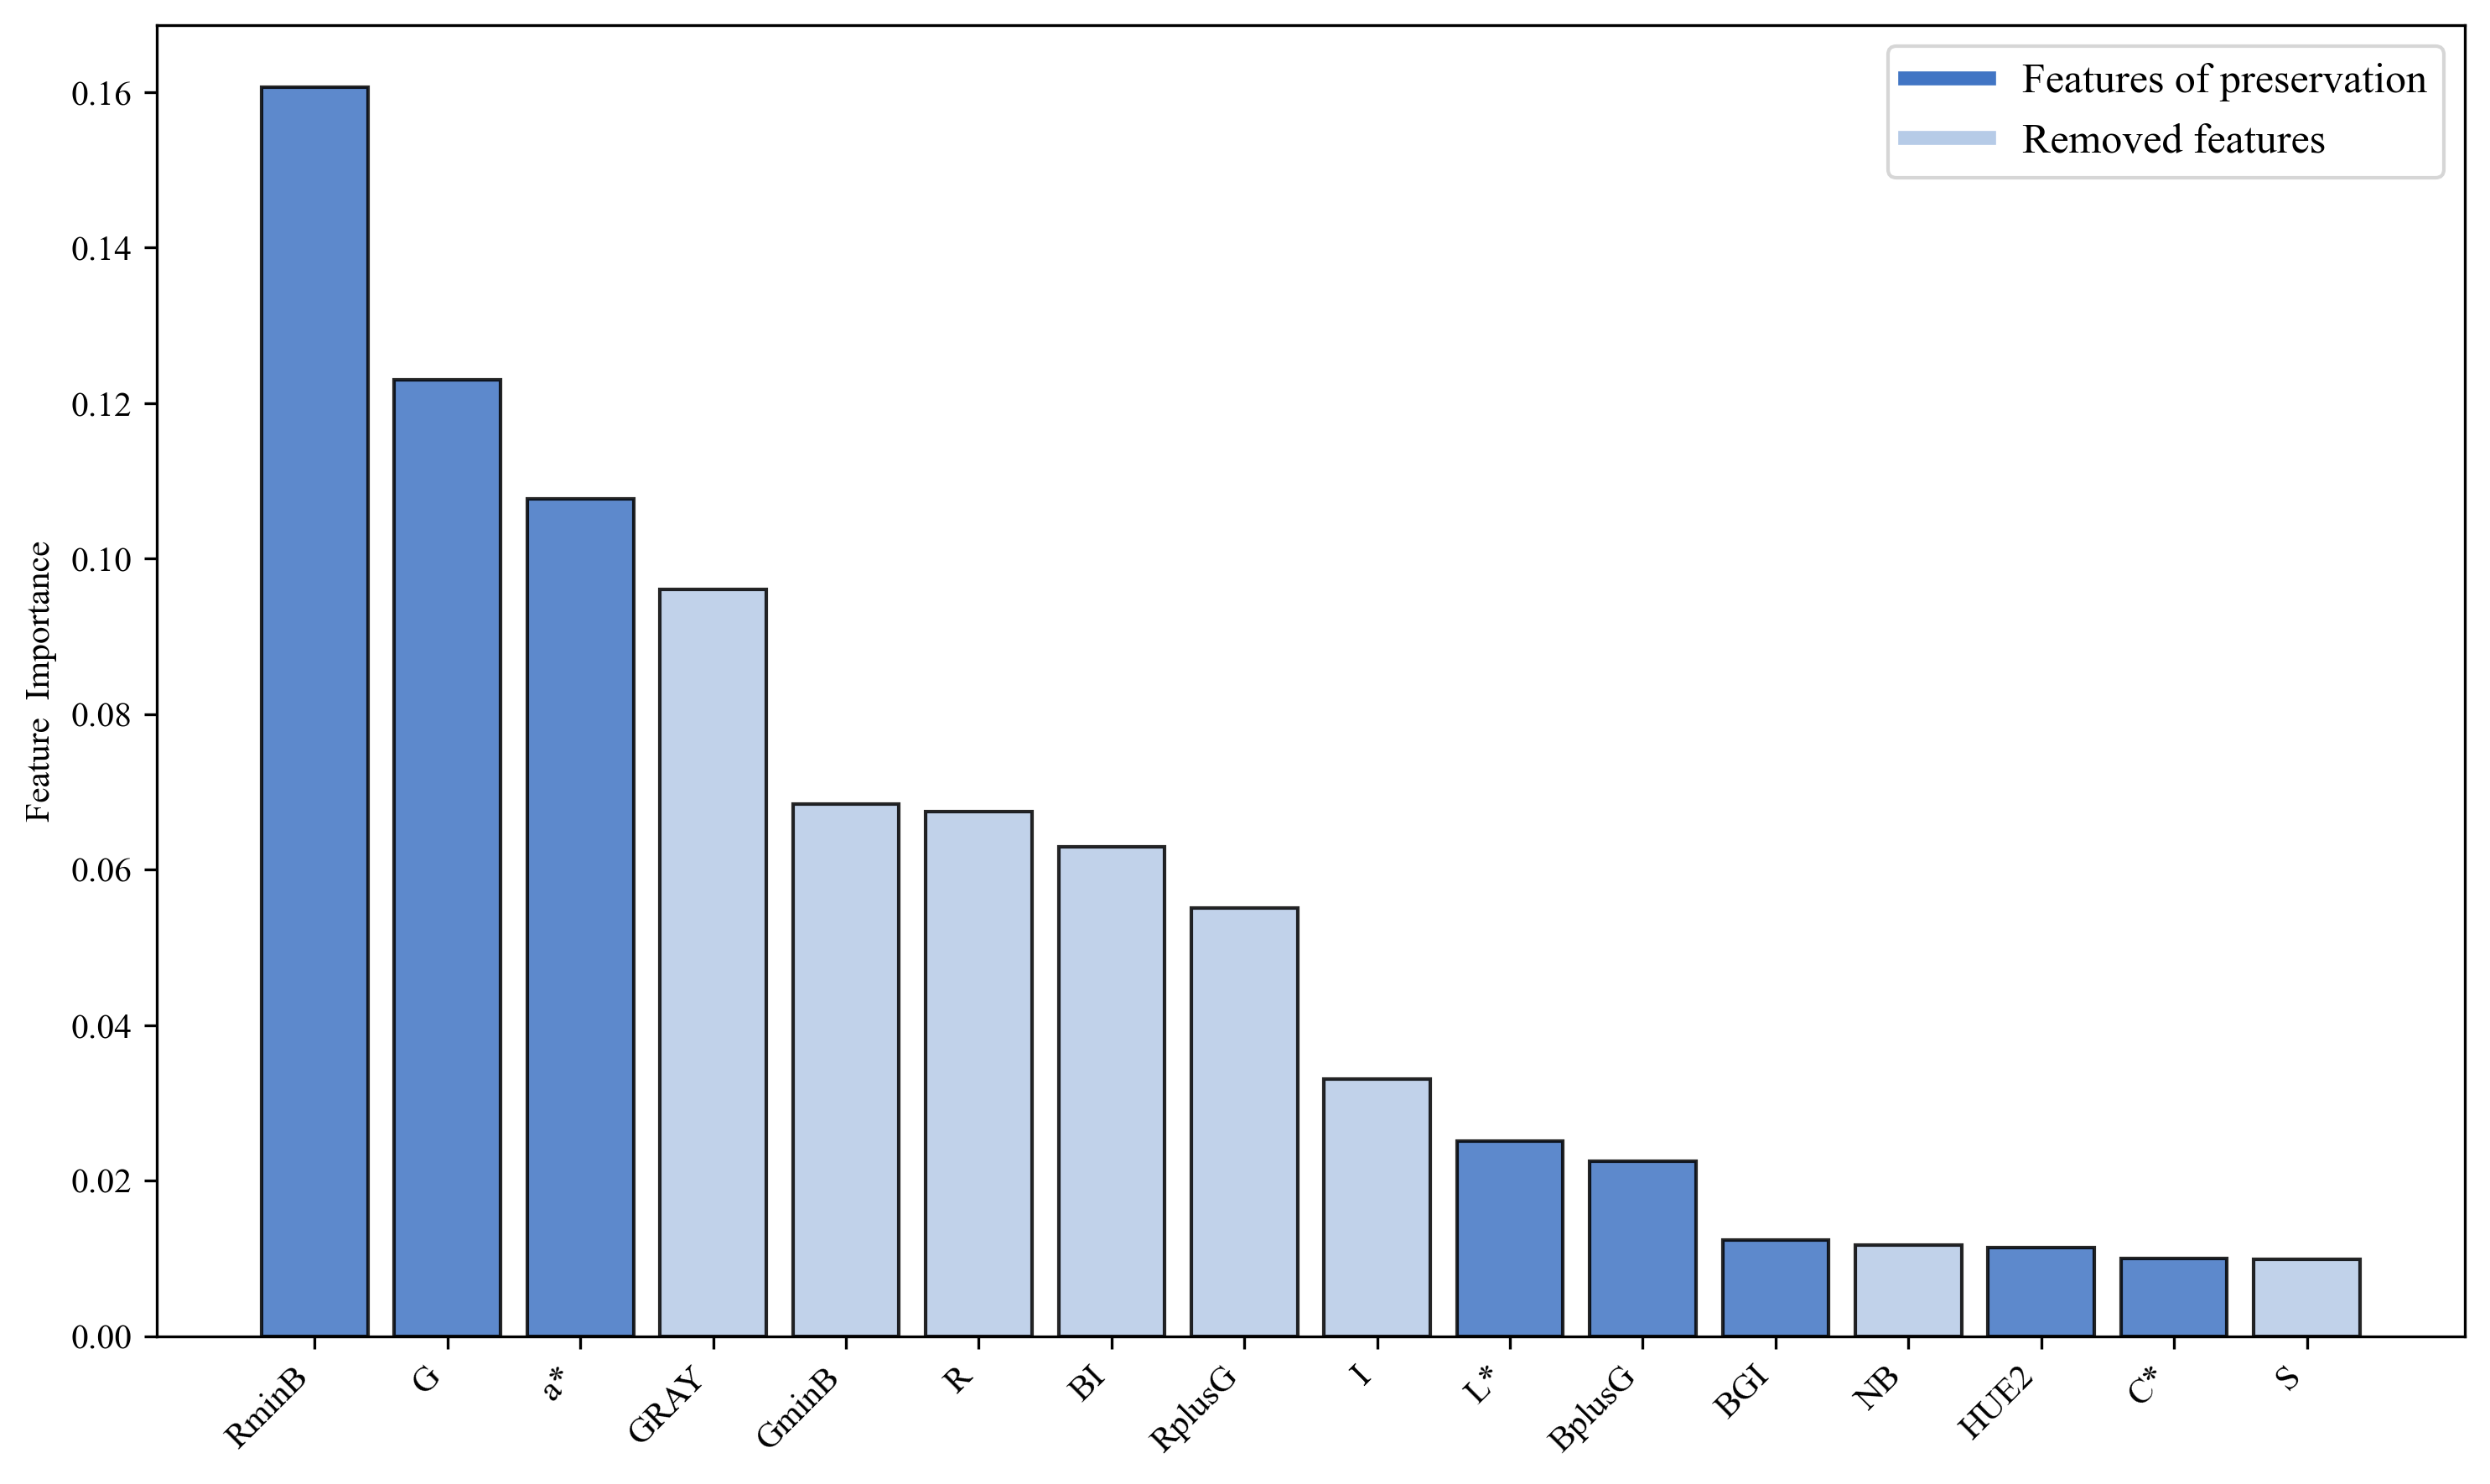

In [33]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, TextArea
import pandas as pd

feature_names = top_sixteen_features_df['Feature'].tolist()  
feature_importances = feature_importance_df.iloc[0:16]['Importance']  
selected_features = final_features  


colors = [(65 / 255, 117 / 255, 196 / 255) if feature in selected_features else (182 / 255, 203 / 255, 231 / 255) 
          for feature in feature_names]


plt.figure(figsize=(10, 6), dpi=300)
bars = plt.bar(feature_names, feature_importances, color=colors, edgecolor='black', alpha=0.85)


red_patch = plt.Line2D([0], [0], color=(65 / 255, 117 / 255, 196 / 255), lw=4, label='Features of preservation')  
blue_patch = plt.Line2D([0], [0], color=(182 / 255, 203 / 255, 231 / 255), lw=4, label='Removed features')  
plt.legend(handles=[red_patch, blue_patch], loc='upper right', fontsize=12)

plt.ylabel('Feature  Importance', fontsize=10)
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.tight_layout()
plt.savefig('Apr_TPA_c.jpg', dpi=600)
plt.show()

In [ ]:
#RF





In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    rf_model = RandomForestRegressor(random_state=42)
    
    cv_scores = cross_val_score(
        estimator=rf_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                           Features  Num_Features  CV Mean R^2
0          [G, a*, BplusG, BGI, C*]             5     0.753796
1      [G, a*, L*, BplusG, BGI, C*]             6     0.752914
2              [G, a*, L*, BGI, C*]             5     0.752404
3                  [G, a*, BGI, C*]             4     0.751728
4    [G, a*, BplusG, BGI, HUE2, C*]             6     0.749960
..                              ...           ...          ...
250                        [BplusG]             1     0.038957
251                        [L*, C*]             2    -0.045301
252                            [L*]             1    -0.076977
253                            [a*]             1    -0.284688
254                            [C*]             1    -0.458541

[255 rows x 3 columns]


best_combination is: ['G', 'a*', 'BplusG', 'BGI', 'C*']


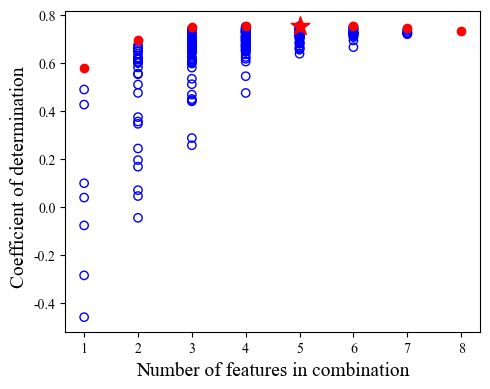

In [37]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))

num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']

best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()

best_index = results_df['CV Mean R^2'].idxmax()


non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values


non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')


best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')


plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TPA_d.jpg', dpi=600)
plt.show()

In [ ]:
#svr





In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    svr_model = SVR(kernel='rbf')
    
    cv_scores = cross_val_score(
        estimator=svr_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                        Features  Num_Features  CV Mean R^2
0          [a*, L*, BplusG, BGI]             4     0.771273
1               [G, a*, L*, BGI]             4     0.770738
2       [G, a*, L*, BplusG, BGI]             5     0.769108
3    [RminB, G, a*, BplusG, BGI]             5     0.766436
4             [RminB, G, a*, L*]             4     0.763599
..                           ...           ...          ...
250                     [a*, C*]             2     0.104445
251                         [a*]             1     0.035622
252                     [L*, C*]             2     0.019971
253                         [C*]             1    -0.047067
254                         [L*]             1    -0.070543

[255 rows x 3 columns]


best_combination is: ['a*', 'L*', 'BplusG', 'BGI']


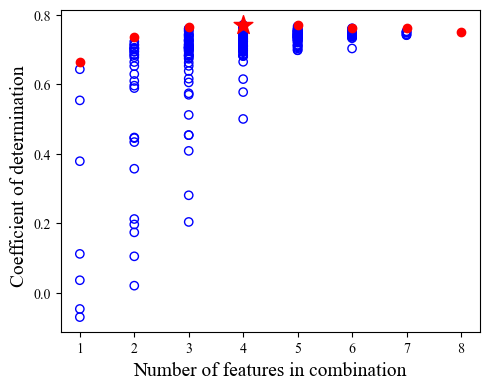

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TPA_e.jpg', dpi=600)
plt.show()

In [ ]:
#mlp




In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    mlp_model = MLPRegressor(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        random_state=42,
        max_iter=200,
        early_stopping=True,
        n_iter_no_change=10,
        validation_fraction=0.1
    )
    
    cv_scores = cross_val_score(
        estimator=mlp_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                               Features  Num_Features  CV Mean R^2
0                 [a*, L*, BplusG, BGI]             4     0.733736
1                 [G, a*, BplusG, HUE2]             4     0.722045
2                 [L*, BplusG, BGI, C*]             4     0.718653
3    [RminB, a*, BplusG, BGI, HUE2, C*]             6     0.718144
4                     [a*, BplusG, BGI]             3     0.716708
..                                  ...           ...          ...
250                            [a*, C*]             2     0.099434
251                                [a*]             1     0.071287
252                                [L*]             1     0.035223
253                                [C*]             1    -0.019541
254                            [L*, C*]             2    -0.031229

[255 rows x 3 columns]


best_combination is: ['a*', 'L*', 'BplusG', 'BGI']


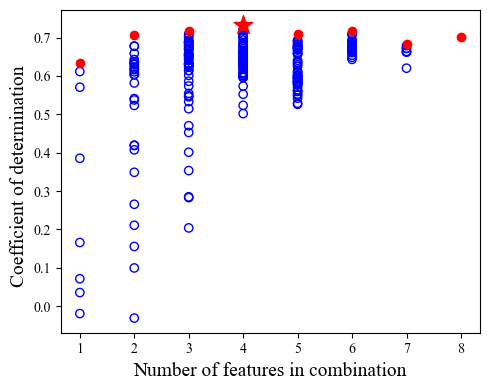

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TPA_f.jpg', dpi=600)
plt.show()

In [ ]:
#xgb





In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    xgb_model = XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=xgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                           Features  Num_Features  CV Mean R^2
0                  [G, a*, BGI, C*]             4     0.742497
1             [a*, BplusG, BGI, C*]             4     0.735251
2         [a*, L*, BplusG, BGI, C*]             5     0.733723
3          [G, a*, BplusG, BGI, C*]             5     0.726177
4    [G, a*, BplusG, BGI, HUE2, C*]             6     0.725880
..                              ...           ...          ...
250                        [a*, C*]             2    -0.263169
251                        [L*, C*]             2    -0.368497
252                            [L*]             1    -0.564919
253                            [a*]             1    -0.643129
254                            [C*]             1    -0.784826

[255 rows x 3 columns]


best_combination is: ['G', 'a*', 'BGI', 'C*']


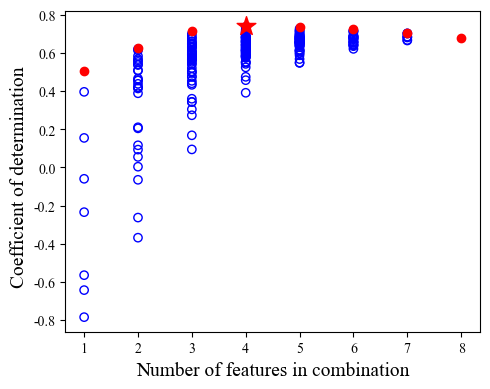

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TPA_g.jpg', dpi=600)
plt.show()

In [ ]:
#lgb





In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import cross_val_score
from itertools import combinations

all_combinations = []
for r in range(1, len(final_features) + 1):
    combinations_list = list(combinations(final_features, r))
    all_combinations.extend(combinations_list)

results = []
for combination in all_combinations:
    selected_features = list(combination)
    X_train_subset = X_train[selected_features]
    X_test_subset = X_test[selected_features]
    
    lgb_model = lgb.LGBMRegressor(
        objective='regression',
        random_state=42,
        n_jobs=-1
    )
    
    cv_scores = cross_val_score(
        estimator=lgb_model,
        X=X_train_subset,
        y=y_train,
        cv=5,
        scoring='r2',
        n_jobs=-1
    )
    
    cv_mean_r2 = cv_scores.mean()
    
    results.append({
        'Features': selected_features,
        'Num_Features': len(selected_features),
        'CV Mean R^2': cv_mean_r2
    })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='CV Mean R^2', ascending=False).reset_index(drop=True)

print(results_df)

                        Features  Num_Features  CV Mean R^2
0    [RminB, G, a*, L*, BGI, C*]             6     0.741717
1           [G, a*, L*, BGI, C*]             5     0.741347
2               [G, a*, L*, BGI]             4     0.739154
3          [G, a*, L*, HUE2, C*]             5     0.738133
4        [RminB, G, a*, L*, BGI]             5     0.735638
..                           ...           ...          ...
250                         [a*]             1     0.106645
251                     [a*, C*]             2     0.065535
252                     [L*, C*]             2     0.060299
253                         [L*]             1     0.053326
254                         [C*]             1    -0.032938

[255 rows x 3 columns]


best_combination is: ['RminB', 'G', 'a*', 'L*', 'BGI', 'C*']


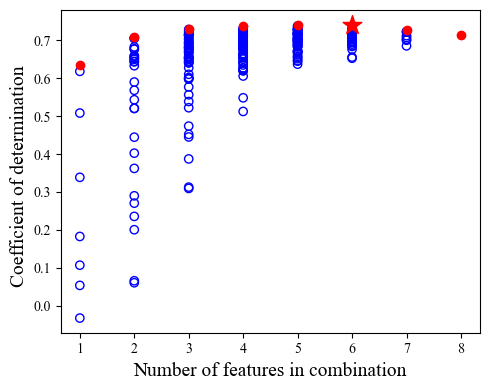

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(5, 4))
num_features = results_df['Num_Features']
r2_scores = results_df['CV Mean R^2']
best_r2_per_num_features = results_df.groupby('Num_Features')['CV Mean R^2'].idxmax()
best_index = results_df['CV Mean R^2'].idxmax()

non_best_indices = [index for index in results_df.index if index not in best_r2_per_num_features.values]
best_indices = best_r2_per_num_features.values

non_best_num_features = num_features[non_best_indices]
non_best_r2_scores = r2_scores[non_best_indices]
plt.scatter(non_best_num_features, non_best_r2_scores, c='none', edgecolors='blue', marker='o')

best_num_features = num_features[best_indices]
best_r2_scores = r2_scores[best_indices]
plt.scatter(best_num_features, best_r2_scores, c='red', edgecolors='red', marker='o')

plt.scatter(num_features[best_index], r2_scores[best_index], marker='*', s=200, color='red')

best_index = results_df['CV Mean R^2'].idxmax()
plt.xticks(np.arange(1, len(final_features) + 1))

best_combination = results_df.loc[best_index, 'Features']
print("best_combination is:", best_combination)
plt.xlabel('Number of features in combination', fontsize=14)
plt.ylabel('Coefficient of determination  ', fontsize=14)
plt.tight_layout()
plt.savefig('Apr_TPA_h.jpg', dpi=600)
plt.show()

In [49]:
#RF
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')


df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")


X = df[['G', 'a*', 'BplusG', 'BGI', 'C*']]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)  


kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)


mae_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'  
)
mae_scores = -mae_scores  

mse_scores = cross_val_score(
    estimator=rf_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error' 
)
rmse_scores = np.sqrt(-mse_scores)  

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7889 0.8173 0.6874 0.7013 0.7741], mean R² ± SD：0.7538 ± 0.0507
MAE ：[0.3556 0.3339 0.476  0.3552 0.3544], mean MAE ± SD：0.375 ± 0.0512
RMSE ：[0.4671 0.4248 0.6105 0.5481 0.4338], mean RMSE ± SD：0.4969 ± 0.0715


In [50]:
#svr
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")

selected_features = ['a*', 'L*', 'BplusG', 'BGI']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR(kernel='rbf')

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8116 0.8289 0.7421 0.6893 0.7845], mean R² ± SD：0.7713 ± 0.0504
MAE ：[0.3177 0.3595 0.4308 0.3856 0.3347], mean MAE ± SD：0.3657 ± 0.0398
RMSE ：[0.4413 0.4111 0.5546 0.559  0.4237], mean RMSE ± SD：0.4779 ± 0.0651


In [51]:
#mlp
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")
selected_features = ['a*', 'L*', 'BplusG', 'BGI']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

mlp_model = MLPRegressor(
    hidden_layer_sizes=(100,),
    activation='relu',
    solver='adam',
    random_state=42,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    validation_fraction=0.1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=mlp_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7632 0.8078 0.6359 0.6968 0.7649], mean R² ± SD：0.7337 ± 0.0604
MAE ：[0.3456 0.3403 0.4936 0.3873 0.3549], mean MAE ± SD：0.3843 ± 0.057
RMSE ：[0.4946 0.4357 0.6589 0.5521 0.4426], mean RMSE ± SD：0.5168 ± 0.0825


In [53]:
#xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
from xgboost import XGBRegressor

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")

selected_features = ['G', 'a*', 'BGI', 'C*']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=xgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.7972 0.7879 0.7213 0.7228 0.6832], mean R² ± SD：0.7425 ± 0.0434
MAE ：[0.3517 0.3494 0.4528 0.3406 0.3967], mean MAE ± SD：0.3782 ± 0.0421
RMSE ：[0.4578 0.4576 0.5765 0.528  0.5137], mean RMSE ± SD：0.5067 ± 0.0451


In [55]:
#lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings
import lightgbm as lgb

warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")

selected_features = ['RminB', 'G', 'a*', 'L*', 'BGI', 'C*']
X = df[selected_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    random_state=42,
    verbose=-1,
    n_jobs=-1
)

kf = KFold(n_splits=5, shuffle=False)

r2_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2'
)

mae_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_absolute_error'
)
mae_scores = -mae_scores

mse_scores = cross_val_score(
    estimator=lgb_model,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='neg_mean_squared_error'
)
rmse_scores = np.sqrt(-mse_scores)

mean_r2, std_r2 = np.mean(r2_scores), np.std(r2_scores)
mean_mae, std_mae = np.mean(mae_scores), np.std(mae_scores)
mean_rmse, std_rmse = np.mean(rmse_scores), np.std(rmse_scores)

print(f"R² ：{r2_scores.round(4)}, mean R² ± SD：{mean_r2.round(4)} ± {std_r2.round(4)}")
print(f"MAE ：{mae_scores.round(4)}, mean MAE ± SD：{mean_mae.round(4)} ± {std_mae.round(4)}")
print(f"RMSE ：{rmse_scores.round(4)}, mean RMSE ± SD：{mean_rmse.round(4)} ± {std_rmse.round(4)}")

R² ：[0.8077 0.8248 0.6146 0.7203 0.7412], mean R² ± SD：0.7417 ± 0.0746
MAE ：[0.3216 0.3573 0.5283 0.3594 0.3547], mean MAE ± SD：0.3843 ± 0.0733
RMSE ：[0.4458 0.416  0.6779 0.5303 0.4643], mean RMSE ± SD：0.5069 ± 0.0934


In [ ]:
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model
#The final prediction of the model

In [63]:
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

X = df[['a*', 'L*', 'BplusG', 'BGI']]
y = df['TPA(mg/g)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()

search_space = {
    'C': Real(1e-5, 0.1, prior='log-uniform'),
    'gamma': Real(1e-5, 0.01, prior='log-uniform'),
    'kernel': Categorical(['linear']),
    'epsilon': Real(0.5, 10.0)
}

bayes_search = BayesSearchCV(
    estimator=svr,
    search_spaces=search_space,
    n_iter=30,
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1
)

bayes_search.fit(X_train, y_train)

best_params = bayes_search.best_params_
print(best_params)

best_model = bayes_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

test_r2 = r2_score(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
test_mae = mean_absolute_error(y_test, y_pred)

train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_mae = mean_absolute_error(y_train, y_train_pred)

print(f"test R2 : {test_r2:.4f}")
print(f"test RMSE : {test_rmse:.4f}")
print(f"test MAE : {test_mae:.4f}")
print(f"train R2 : {train_r2:.4f}")
print(f"train RMSE : {train_rmse:.4f}")
print(f"train MAE : {train_mae:.4f}")

OrderedDict({'C': 0.07385094560742532, 'epsilon': 0.5, 'gamma': 1e-05, 'kernel': 'linear'})
test R2 : 0.6137
test RMSE : 0.6003
test MAE : 0.4782
train R2 : 0.6361
train RMSE : 0.6082
train MAE : 0.4837


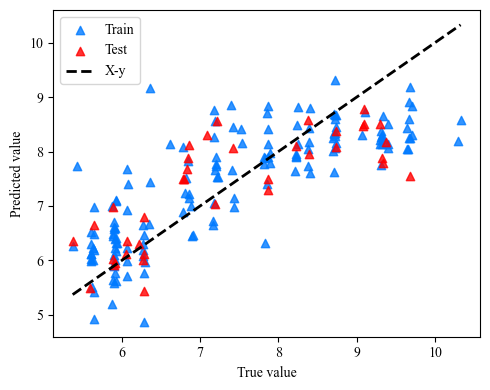

In [64]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 7.390407
std_value = 1.372206

y_train_original = y_train * std_value + mean_value
y_train_pred_original = y_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = y_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')

plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.legend()

plt.tight_layout()
plt.savefig('Apr_TPA_i.jpg', dpi=600)
plt.show()

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings('ignore')

df = pd.read_excel("C:\\Users\\30393\\Desktop\\Apr_TPA_scaler.xlsx")

model_features = {
    'RF': ['G', 'a*', 'BplusG', 'BGI', 'C*'],
    'SVR': ['a*', 'L*', 'BplusG', 'BGI'],
    'MLP': ['a*', 'L*', 'BplusG', 'BGI'],
    'XGBoost': ['G', 'a*', 'BGI', 'C*'],
    'LightGBM': ['RminB', 'G', 'a*', 'L*', 'BGI', 'C*'],
}

all_required_features = list(set([f for features in model_features.values() for f in features]))

X = df[all_required_features]
y = df['TPA(mg/g)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

base_models = {
    'RF': {
        'model': RandomForestRegressor(random_state=42),
        'use_scaler': False
    },
    'SVR': {
        'model': SVR(kernel='rbf'),
        'use_scaler': False
    },
    'MLP': {
        'model': MLPRegressor(random_state=42, max_iter=1000),
        'use_scaler': False
    },
    'XGBoost': {
        'model': XGBRegressor(random_state=42, verbosity=0),
        'use_scaler': False
    },
    'LightGBM': {
        'model': LGBMRegressor(random_state=42, verbose=-1),
        'use_scaler': False
    }
}

def generate_oof_predictions(model, X, y, features, n_splits=5):
    oof_preds = np.zeros(len(y))
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    for train_idx, val_idx in kf.split(X):
        X_train_fold = X.iloc[train_idx][features].values
        y_train_fold = y.iloc[train_idx].values.ravel()
        X_val_fold = X.iloc[val_idx][features].values
        
        model.fit(X_train_fold, y_train_fold)
        oof_preds[val_idx] = model.predict(X_val_fold)
    
    return oof_preds

optimized_models = {}

for name, model_info in base_models.items():
    print(f"\ntrain {name} model (feature: {model_features[name]})...")
    
    features = model_features[name]
    
    X_train_subset = X_train[features]
    
    model = model_info['model']
    model.fit(X_train_subset, y_train)
    
    optimized_models[name] = {
        'model': model,
        'features': features
    }

meta_features_train = []

for name, model_info in optimized_models.items():
    print(f"being {name} OOF...")
    oof_pred = generate_oof_predictions(
        model_info['model'], 
        X_train, 
        y_train, 
        model_info['features']
    )
    meta_features_train.append(oof_pred.reshape(-1, 1))

meta_features_train = np.hstack(meta_features_train)

meta_model = Lasso(random_state=42)

param_bayes = {
    'alpha': Real(1e-5, 1e2, prior='log-uniform'),
    'fit_intercept': Categorical([True, False]),
    'max_iter': Integer(100, 500),
}

bayes_search = BayesSearchCV(
    estimator=meta_model,
    search_spaces=param_bayes,
    n_iter=100,
    cv=5,
    scoring='r2',
    optimizer_kwargs={'n_initial_points': 10},
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(meta_features_train, y_train.values.ravel())
best_meta_model = bayes_search.best_estimator_

print(f"\nmodel-param: {bayes_search.best_params_}")
print(f"model-R2: {bayes_search.best_score_:.4f}")

meta_features_test = []

for name, model_info in optimized_models.items():
    model = model_info['model']
    features = model_info['features']
    
    model.fit(X_train[features].values, y_train.values.ravel())
    
    test_pred = model.predict(X_test[features].values).reshape(-1, 1)
    meta_features_test.append(test_pred)

meta_features_test = np.hstack(meta_features_test)

final_pred = best_meta_model.predict(meta_features_test)

test_r2 = r2_score(y_test, final_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, final_pred))
test_mae = mean_absolute_error(y_test, final_pred)

print("\ntest:")
print(f"R2: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f}")
print(f"MAE: {test_mae:.4f}")

final_train_pred = best_meta_model.predict(meta_features_train)
train_r2 = r2_score(y_train, final_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, final_train_pred))
train_mae = mean_absolute_error(y_train, final_train_pred)

print("\ntrain:")
print(f"R2: {train_r2:.4f}")
print(f"RMSE: {train_rmse:.4f}")
print(f"MAE: {train_mae:.4f}")


train RF model (feature: ['G', 'a*', 'BplusG', 'BGI', 'C*'])...

train SVR model (feature: ['a*', 'L*', 'BplusG', 'BGI'])...

train MLP model (feature: ['a*', 'L*', 'BplusG', 'BGI'])...

train XGBoost model (feature: ['G', 'a*', 'BGI', 'C*'])...

train LightGBM model (feature: ['RminB', 'G', 'a*', 'L*', 'BGI', 'C*'])...
being RF OOF...
being SVR OOF...
being MLP OOF...
being XGBoost OOF...
being LightGBM OOF...

model-param: OrderedDict({'alpha': 0.008144736809836335, 'fit_intercept': False, 'max_iter': 500})
model-R2: 0.7617

test:
R2: 0.7526
RMSE: 0.4804
MAE: 0.3476

train:
R2: 0.7791
RMSE: 0.4739
MAE: 0.3564


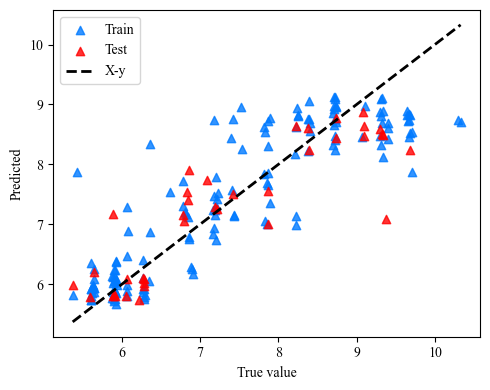

In [59]:
import numpy as np
import matplotlib.pyplot as plt

mean_value = 7.390407
std_value = 1.372206

y_train_original = y_train * std_value + mean_value
y_train_pred_original = final_train_pred * std_value + mean_value

y_test_original = y_test * std_value + mean_value
y_pred_original = final_pred * std_value + mean_value

plt.figure(figsize=(5, 4))

plt.scatter(y_train_original, y_train_pred_original, alpha=0.8, label='Train', color='#007AFF', marker='^')
plt.scatter(y_test_original, y_pred_original, alpha=0.8, label='Test', color='r', marker='^')

min_val = min(y_train_original.min(), y_test_original.min())
max_val = max(y_train_original.max(), y_test_original.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=2, label='X-y')

plt.xlabel('True value')
plt.ylabel('Predicted')
plt.legend()
plt.tight_layout()
plt.savefig('Apr_TPA_j.jpg', dpi=300)
plt.show()

RF: 0.3546
SVR: 0.1352
MLP: 0.0435
XGBoost: 0.0000
LightGBM: 0.1689


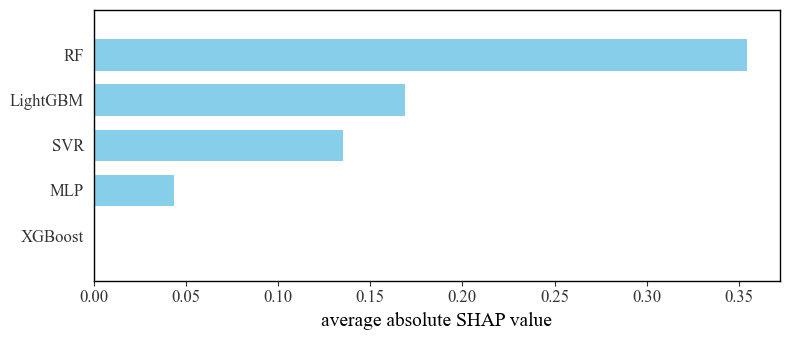

In [60]:
import shap
import matplotlib.pyplot as plt
import numpy as np

base_model_names = ['RF', 'SVR', 'MLP', 'XGBoost', 'LightGBM']

explainer = shap.LinearExplainer(best_meta_model, meta_features_train)
shap_values = explainer.shap_values(meta_features_test)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)


for model_name, shap_val in zip(base_model_names, mean_abs_shap):
    print(f"{model_name}: {shap_val:.4f}")

shap.summary_plot(
    shap_values, 
    meta_features_test, 
    feature_names=base_model_names,
    plot_type="bar",
    color='skyblue',  
    show=False
)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.xlabel("average absolute SHAP value", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('Apr_TPA_k.png', dpi=600, bbox_inches='tight')
plt.tight_layout()
plt.show()

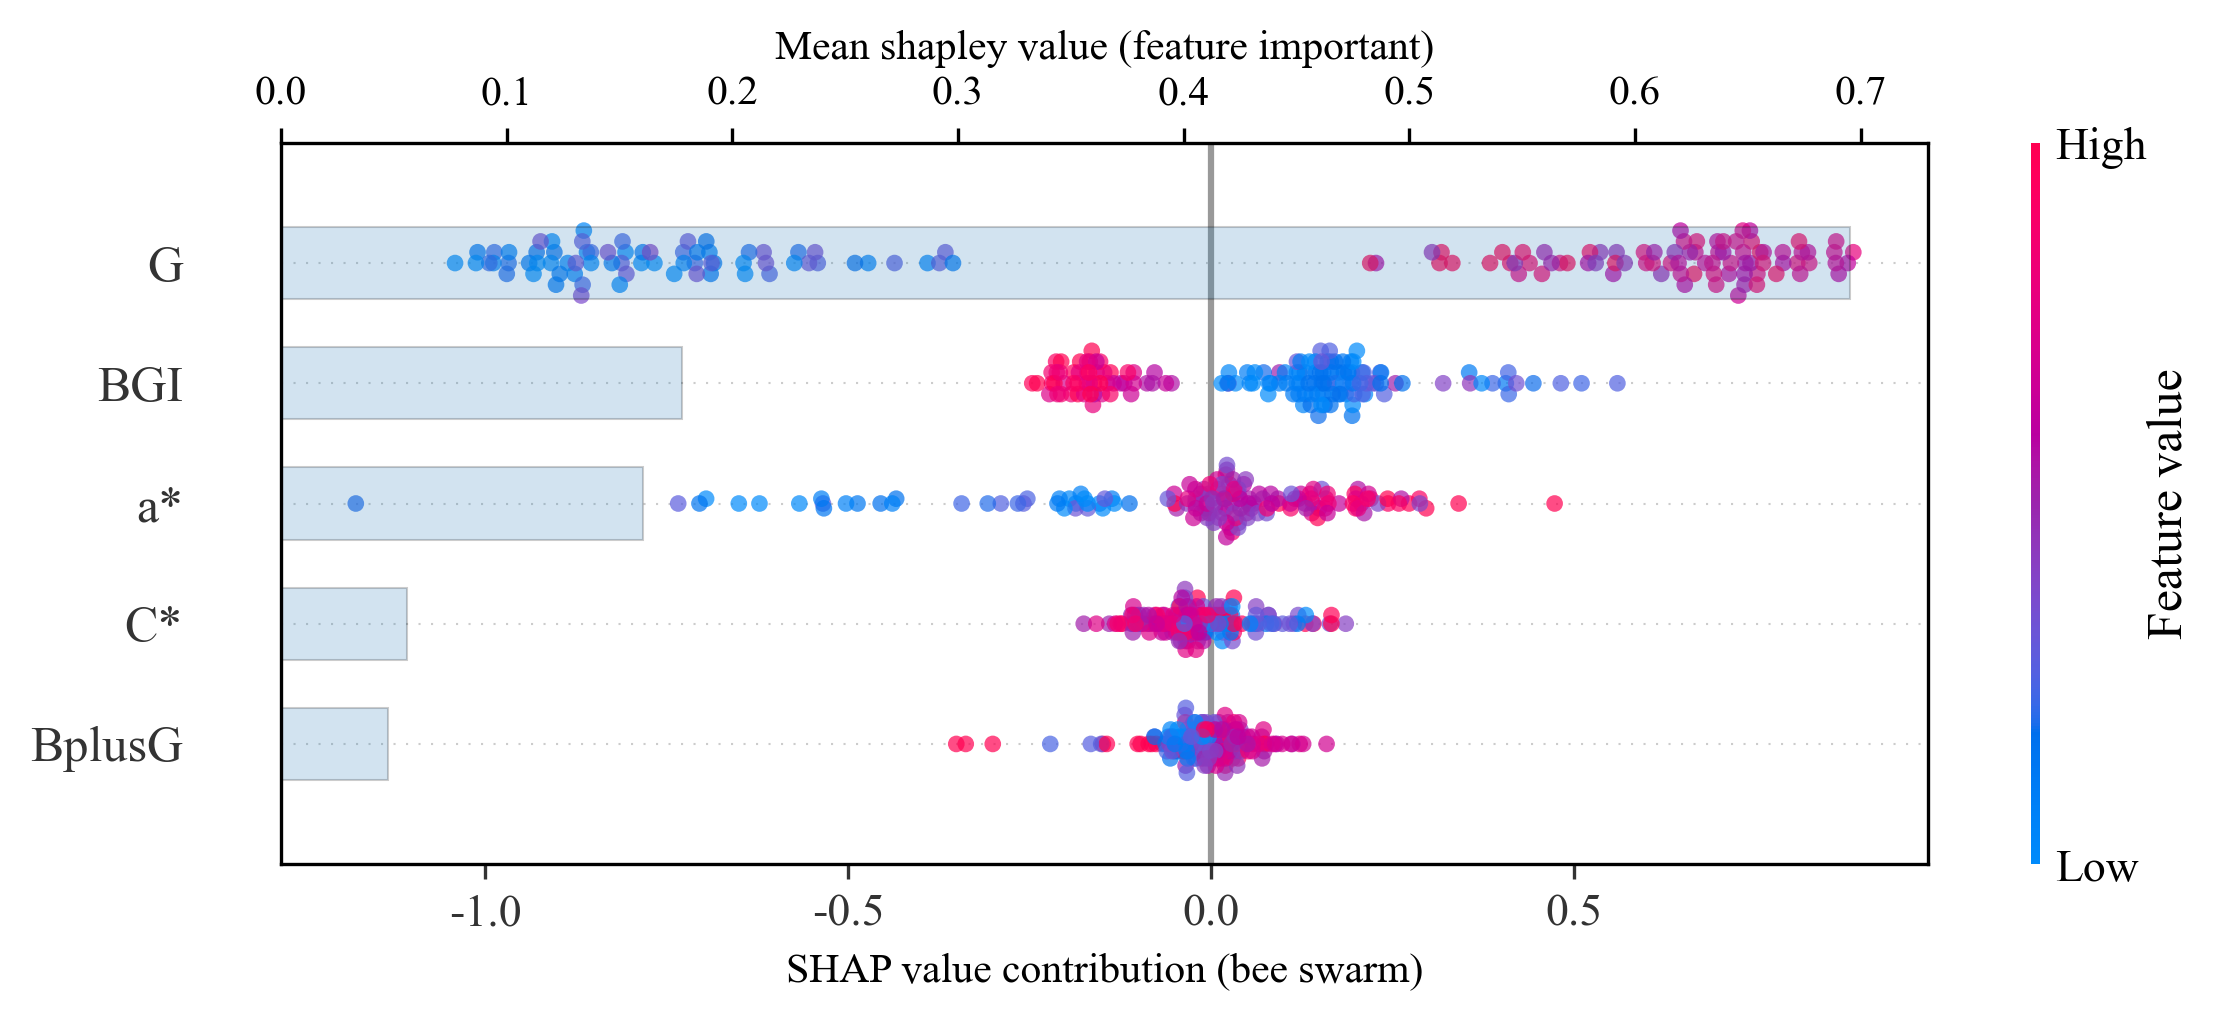

In [61]:
import shap
import matplotlib.pyplot as plt
import numpy as np

rf_model = optimized_models['RF']['model']
rf_features = model_features['RF']

X_train_rf = X_train[rf_features]

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train_rf)

mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
sorted_indices = np.argsort(mean_abs_shap)[::-1]
sorted_features = [rf_features[i] for i in sorted_indices]

sorted_shap_values = shap_values[:, sorted_indices]
sorted_X_train = X_train_rf[sorted_features]
sorted_mean_abs = mean_abs_shap[sorted_indices]

plt.figure(figsize=(12, 8), dpi=300)
plt.rcParams.update({'font.size': 10, 'font.family': 'Times New Roman'})

shap.summary_plot(
    sorted_shap_values,
    sorted_X_train,
    feature_names=sorted_features,
    plot_type="dot",
    show=False,
    sort=False,
    alpha=0.7
)
ax1 = plt.gca()
ax1.set_ylabel('')
ax1.tick_params(axis='y', labelsize=12)
ax1.set_xlabel('SHAP value contribution (bee swarm)', fontsize=10)

ax2 = ax1.twiny()
ax2.grid(False)
ax2.set_ylim(ax1.get_ylim())

y_pos = np.arange(len(sorted_features))[::-1]
bars = ax2.barh(
    y=y_pos,
    width=sorted_mean_abs,
    height=0.6,
    color='#1f77b4',
    alpha=0.2,
    edgecolor='black',
    linewidth=0.5
)

ax2.set_xlabel('Mean shapley value (feature important)', fontsize=10)
ax2.xaxis.set_label_position('top')
ax2.tick_params(
    axis='x',
    which='both',
    bottom=False,
    labelbottom=False
)
ax2.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.savefig('Apr_TPA_l.png', dpi=600, bbox_inches='tight')
plt.show()

In [62]:
print("\nFeature importance (mean absolute SHAP value):")
mean_abs_shap = np.mean(np.abs(shap_values), axis=0)
for i, feature in enumerate(rf_features):
    print(f"{feature}: {mean_abs_shap[i]:.4f}")


Feature importance (mean absolute SHAP value):
G: 0.6952
a*: 0.1605
BplusG: 0.0474
BGI: 0.1776
C*: 0.0560
